# Kütüphanelerin İçeri Aktarılması

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Veri Setinin İçeri Aktarılması

In [4]:
df = pd.read_csv("Avm_Musterileri.csv")
df.tail()

,CustomerID,Annual Income (k$),Spending Score (1-100)
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18
199,200,137,83


# Veri Setinin Gözlemlenmesi

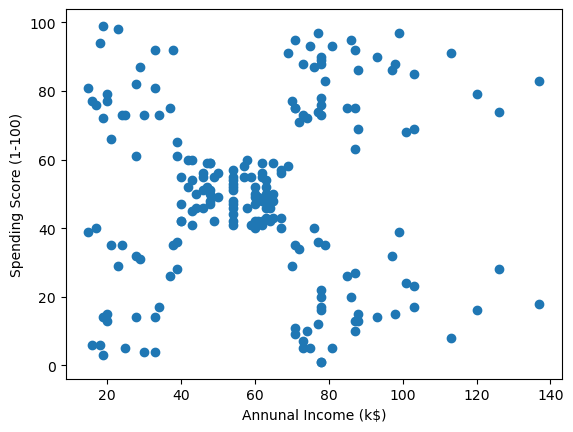

In [5]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annunal Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Sütunların Amaca Göre Adlandırılması

In [6]:
#Sütun isimlendirme
df.rename(columns = {"Annual Income (k$)":"income", "Spending Score (1-100)":"score"}, inplace =True)

# Veri Setinin Ölçeklemesi

In [8]:
#Min Max Scaler fonksiyonu

scaler = MinMaxScaler()

scaler.fit(df[["income"]])
df["income"] = scaler.transform(df[["income"]])

scaler.fit(df[["score"]])
df["score"] = scaler.transform(df[["score"]])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [9]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


# Elbow Yöntemi Kullanılarak "K" Değerinin Belirlenmesi

In [16]:
#elbow yöntemi kullanılarak k değerinin belirlenmesi

k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters = k)
    kmeans_modelim.fit(df[["income","score"]])
    list_dist.append(kmeans_modelim.inertia_)

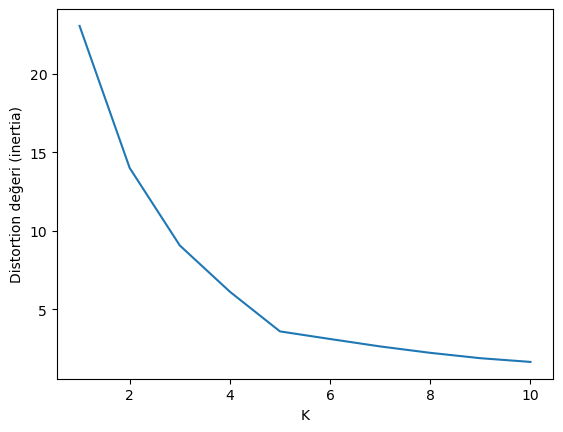

In [17]:
plt.xlabel("K")
plt.ylabel("Distortion değeri (inertia)")
plt.plot(k_range,list_dist)
plt.show()

### K = 5 değeri en uygun değer olarak gözükmektedir.

# KMeans Modelinin Kurulumu

In [30]:
kmeans_modelim = KMeans(n_clusters = 5)
y_predicted = kmeans_modelim.fit_predict(df[["income","score"]])
y_predicted

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [21]:
df["cluster"] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,2
1,2,0.000000,0.816327,3
2,3,0.008197,0.051020,2
3,4,0.008197,0.775510,3
4,5,0.016393,0.397959,2


In [22]:
kmeans_modelim.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

In [23]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

# Modelin Görsel Olarak İncelenmesi

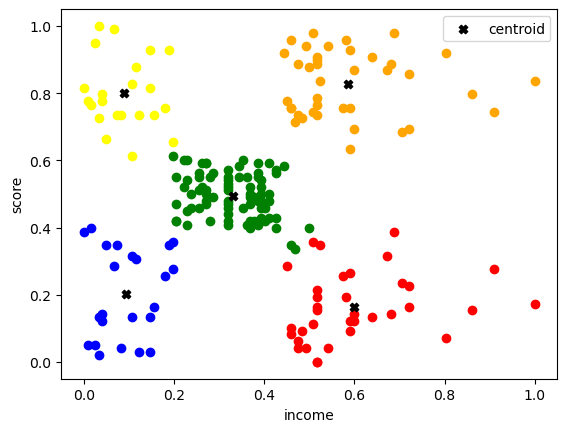

In [29]:
plt.xlabel("income")
plt.ylabel("score")

plt.scatter(df1["income"],df1["score"],color ="green")
plt.scatter(df2["income"],df2["score"],color ="red")
plt.scatter(df3["income"],df3["score"],color ="blue")
plt.scatter(df4["income"],df4["score"],color ="yellow")
plt.scatter(df5["income"],df5["score"],color ="orange")

plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1],color ="black",marker="X", label="centroid")
plt.legend()
plt.show()